## Machine Learning
- Nama   : Sabna Devi Kumalasari
- NIM    : 2141720009
- Kelas  : TI-3E

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\Users\WINDOWS 10\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Kuis 1

In [5]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

In [6]:
# Buat dataframe dari dictionary mnist, pada dataframe ini nama kolomnya menggunakan feature_names yaitu jumlah pixel keseluruhan dalam citra angka tersebut (terdapat 784 pixel dalam satu citra).
# kemudian isi data dari dataframe ini akan diisi dengan value dari key data pada dictionary mnist.
data = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)

# Setelah itu ditambahkan sebuah kolom baru dengan nama target dan isinya dari value keys target dictionary mnist yang akan menjadi target pada model kali ini.
data['target'] = mnist.target.astype(int)

# Tampilkan dataframe
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: target, dtype: int64


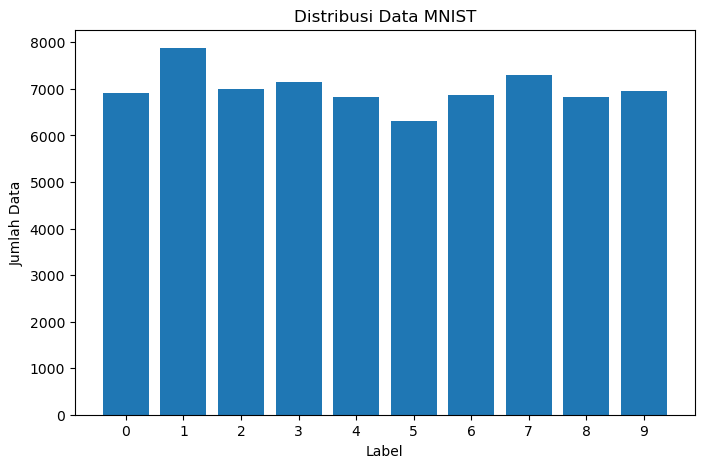

In [7]:
# Menghitung jumlah data untuk setiap labelnya
label_counts = data['target'].value_counts().sort_index()

# Menampilkan hasil penghitungan setiap label dalam bentuk grafik bar menggunakan matplotlib
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data MNIST')
plt.xticks(label_counts.index)
print(label_counts)
plt.show()


- Dari hasil diatas, terlihat bahwa ada perbedaan dalam jumlah data antara label-label tersebut, namun tidak besar. Jadi, terdapat sedikit ketidakseimbangan dalam dataset MNIST. Namun, tingkat ketidakseimbangan ini tidak terlalu signifikan sehingga dataset MNIST masih dapat dianggap cukup seimbang dalam pengenalan digit. Untuk kebanyakan kasus, perbedaan jumlah data antar label tidak akan menjadi masalah yang serius.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.


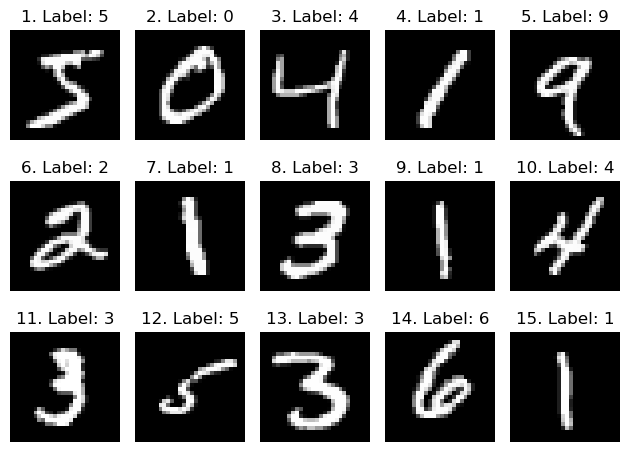

In [8]:
# Ambil 15 citra pertama
images = mnist.data[:15]
labels = mnist.target[:15]

# Menampilkan citra dan labelnya
for i in range(15):
    image = images.iloc[i].values.reshape(28, 28)  # Reshape citra ke ukuran asli
    plt.subplot(3, 5, i + 1)  # Membuat subplot 3x5
    plt.imshow(image, cmap='gray')  # Menampilkan citra dalam skala abu-abu
    plt.title(f"{i+1}. Label: {labels.iloc[i]}")
    plt.axis('off')  # Menyembunyikan sumbu x dan y

plt.tight_layout()
plt.show()

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
  - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
  - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.


  >> Pada langkah ini, saya menggunakan metode ekstraksi fitur dengan PCA dengan jumlah component sebanyak 70. Proses ekstraksi ini akan mengidentifikasi fitur yang menjadi prioritas atau fitur paling penting dalam sebuah dataset.

In [9]:
# Slice kolom fitur dengan kolom target
X = data.drop('target', axis=1)
# Ubah tipe data menjadi integer
X = X.astype(int)
X /= 255

# Lakukan ekstraksi PCA
pca = PCA(n_components=70)
pc = pca.fit_transform(X)

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.


In [10]:
X = pc
y = mnist.target.values.astype("int64")

# 70:30
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.1, test_size=0.3, random_state=42)
# 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.2, test_size=0.2, random_state=42)
# 90:10
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.3, test_size=0.1, random_state=42)

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
  - Anda diperbolehkan untuk melakukan tunning parameter.
  - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.


Naive Bayes

In [11]:
#70:30
gnb1 = GaussianNB()
gnb1.fit(X_train1, y_train1)

#80:20
gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

#90:10
gnb3 = GaussianNB()
gnb3.fit(X_train3, y_train3)

GaussianNB()

SVM

In [12]:
# Fitting SVM 70:30
svc1 = SVC(kernel='rbf')
svc1.fit(X_train1, y_train1)

# Fitting SVM 80:20
svc2 = SVC(kernel='rbf')
svc2.fit(X_train2, y_train2)

# Fitting SVM 90:10
svc3 = SVC(kernel='rbf')
svc3.fit(X_train3, y_train3)

SVC()

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
  - Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
  - Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
  - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

Naive Bayes
- Metric Accuracy

In [14]:
# Metric Accuracy
# 70 : 30

# Prediksi dengan data training
y_train_pred1 = gnb1.predict(X_train1)

# Evaluasi akurasi training
acc_train1 = accuracy_score(y_train1, y_train_pred1)

# Prediksi test data
gnb_y_test_pred1 = gnb1.predict(X_test1)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test1, gnb_y_test_pred1)

# 80 : 20

# Prediksi dengan data training
y_train_pred2 = gnb2.predict(X_train2)

# Evaluasi akurasi training
acc_train2 = accuracy_score(y_train2, y_train_pred2)

# Prediksi test data
gnb_y_test_pred2 = gnb2.predict(X_test2)

# Evaluasi model dengan metric akurasi
acc_test2 = accuracy_score(y_test2, gnb_y_test_pred2)

# 90 : 10

# Prediksi dengan data training
gnb_y_train_pred3 = gnb3.predict(X_train3)

# Evaluasi akurasi training
acc_train3 = accuracy_score(y_train3, gnb_y_train_pred3)

# Prediksi test data
gnb_y_test_pred3 = gnb3.predict(X_test3)

# Evaluasi model dengan metric akurasi
acc_test3 = accuracy_score(y_test3, gnb_y_test_pred3)

# Print hasil evaluasi metric akurasi 70:30
print(f'Hasil akurasi data train 70:30 : {acc_train1}')
print(f'Hasil akurasi data test 70:30  : {acc_test}')
# Print hasil evaluasi metric akurasi 80:20
print(f'\nHasil akurasi data train 80:20 : {acc_train2}')
print(f'Hasil akurasi data test 80:20  : {acc_test2}')
# Print hasil evaluasi metric akurasi 90:10
print(f'\nHasil akurasi data train 90:10 : {acc_train3}')
print(f'Hasil akurasi data test 90:10  : {acc_test3}')


Hasil akurasi data train 70:30 : 0.8787142857142857
Hasil akurasi data test 70:30  : 0.8707619047619047

Hasil akurasi data train 80:20 : 0.8779285714285714
Hasil akurasi data test 80:20  : 0.8715

Hasil akurasi data train 90:10 : 0.8761904761904762
Hasil akurasi data test 90:10  : 0.8715714285714286


- Classification Report

In [15]:
# Print hasil classification Report 70:30
print(f'Hasil akurasi data train 70:30 : {classification_report(y_test1, gnb_y_test_pred1)}')
# Print hasil classification Report 80:20
print(f'\nHasil akurasi data train 80:20 : {classification_report(y_test2, gnb_y_test_pred2)}')
# Print hasil classification Report 90:10
print(f'\nHasil akurasi data train 90:10 : {classification_report(y_test3, gnb_y_test_pred3)}')

Hasil akurasi data train 70:30 :               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2058
           1       0.97      0.94      0.96      2364
           2       0.80      0.85      0.83      2133
           3       0.83      0.85      0.84      2176
           4       0.85      0.83      0.84      1936
           5       0.78      0.83      0.81      1915
           6       0.93      0.91      0.92      2088
           7       0.93      0.86      0.89      2248
           8       0.83      0.84      0.84      1992
           9       0.83      0.82      0.83      2090

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000


Hasil akurasi data train 80:20 :               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1343
           1       0.97      0.94      0.96      1600
           

- Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

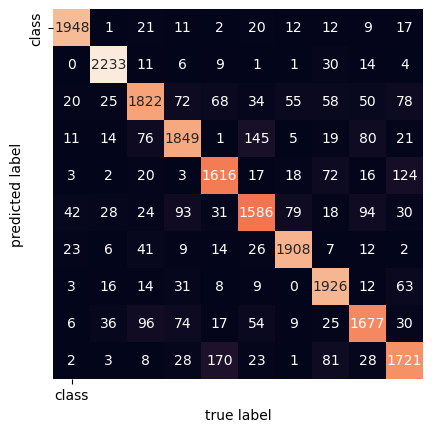

In [16]:
# 70:30
mat = confusion_matrix(y_test1, gnb_y_test_pred1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

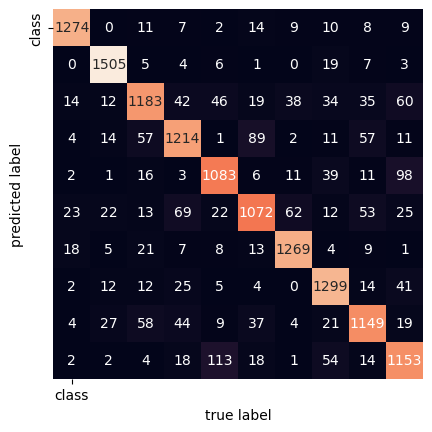

In [17]:
# 80:20
mat = confusion_matrix(y_test2, gnb_y_test_pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

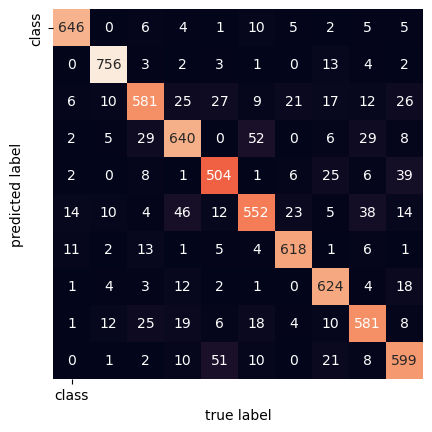

In [18]:
# 90:10
mat = confusion_matrix(y_test3, gnb_y_test_pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

SVM
- Metric Accuracy

In [19]:
# Metric Accuracy

# 70:30
# Prediksi dengan data training
y_train_pred1 = svc1.predict(X_train1)
# Evaluasi akurasi training
svc_acc_train = accuracy_score(y_train1, y_train_pred1)
# Prediksi test data
y_test_pred = svc1.predict(X_test1)
# Evaluasi model dengan metric akurasi
svc_acc_test = accuracy_score(y_test1, y_test_pred)

# 80 : 20
# Prediksi dengan data training
y_train_pred2 = svc2.predict(X_train2)
# Evaluasi akurasi training
svc_acc_train2 = accuracy_score(y_train2, y_train_pred2)
# Prediksi test data
y_test_pred2 = svc2.predict(X_test2)
# Evaluasi model dengan metric akurasi
svc_acc_test2 = accuracy_score(y_test2, y_test_pred2)

# 90 : 10
# Prediksi dengan data training
y_train_pred3 = svc3.predict(X_train3)
# Evaluasi akurasi training
svc_acc_train3 = accuracy_score(y_train3, y_train_pred3)
# Prediksi test data
y_test_pred3 = svc3.predict(X_test3)
# Evaluasi model dengan metric akurasi
svc_acc_test3 = accuracy_score(y_test3, y_test_pred3)


# Print hasil evaluasi metric akurasi 70:30
print(f'Hasil akurasi data train 70:30 : {svc_acc_train}')
print(f'Hasil akurasi data test 70:30 : {svc_acc_test}')
# Print hasil evaluasi metric akurasi 80:20
print(f'\nHasil akurasi data train 80:20 : {svc_acc_train2}')
print(f'Hasil akurasi data test 80:20 : {svc_acc_test2}')
# Print hasil evaluasi metric akurasi 90:10
print(f'\nHasil akurasi data train 90:10 : {svc_acc_train3}')
print(f'Hasil akurasi data test 90:10 : {svc_acc_test3}')

Hasil akurasi data train 70:30 : 0.9898571428571429
Hasil akurasi data test 70:30 : 0.9633809523809523

Hasil akurasi data train 80:20 : 0.9905714285714285
Hasil akurasi data test 80:20 : 0.9710714285714286

Hasil akurasi data train 90:10 : 0.9914285714285714
Hasil akurasi data test 90:10 : 0.9741428571428571


- Classification Report

In [21]:
# Print hasil classification Report 70:30
print(f'Hasil akurasi data train 70:30 : {classification_report(y_test1, y_test_pred)}')
# Print hasil classification Report 80:20
print(f'\nHasil akurasi data train 80:20 : {classification_report(y_test2, y_test_pred2)}')
# Print hasil classification Report 90:10
print(f'\nHasil akurasi data train 90:10 : {classification_report(y_test3, y_test_pred3)}')

Hasil akurasi data train 70:30 :               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2058
           1       0.97      0.99      0.98      2364
           2       0.96      0.96      0.96      2133
           3       0.95      0.95      0.95      2176
           4       0.95      0.97      0.96      1936
           5       0.96      0.96      0.96      1915
           6       0.98      0.98      0.98      2088
           7       0.96      0.97      0.96      2248
           8       0.96      0.94      0.95      1992
           9       0.96      0.94      0.95      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000


Hasil akurasi data train 80:20 :               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           

- Confusion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

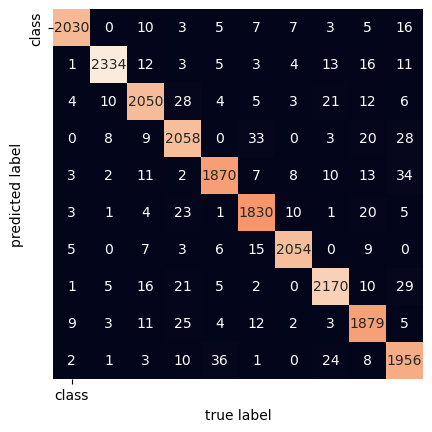

In [22]:
# 70:30
mat = confusion_matrix(y_test1, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

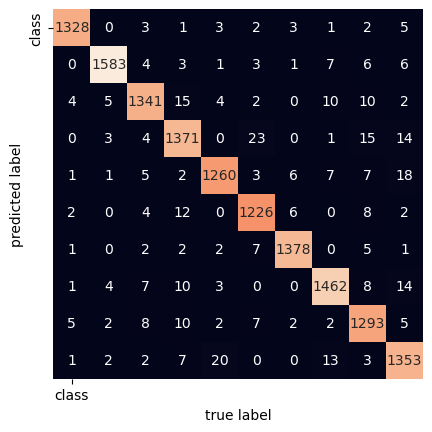

In [23]:
# 80:20
mat = confusion_matrix(y_test2, y_test_pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

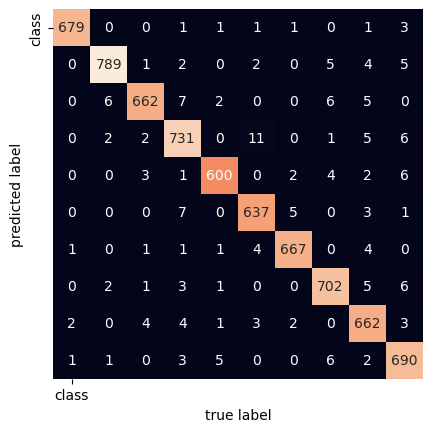

In [24]:
# 90:10
mat = confusion_matrix(y_test3, y_test_pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet
03 sebagai acuan.

In [25]:
# Buat fungsi untuk menampilkan citra data dan testing beserta hasil pelabelannya
def label_test(xtest, ytest, ypred):
  X_ori = pca.inverse_transform(xtest)
  plt.figure(figsize=(8, 7))
  plt.subplots_adjust(wspace=0.3, hspace=1)
  for i, (img, y) in enumerate(zip(X_ori[:15].reshape(-1, 28, 28), ytest[:15])):
    if ytest[i] == ypred[i]:
      text_color = 'black'
    else:
        text_color = 'red'
    plt.subplot(5, 5, 1 + i)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {ytest[i]}\nPredict: {ypred[i]}")
    plt.xticks([])
    plt.yticks([])

Naive Bayes

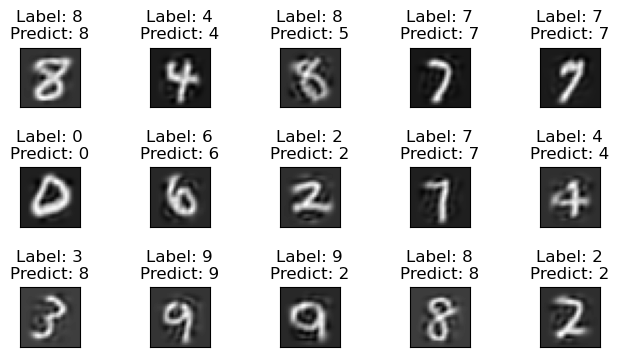

In [26]:
# 70 : 30
label_test(X_test1, y_test1, gnb_y_test_pred1)

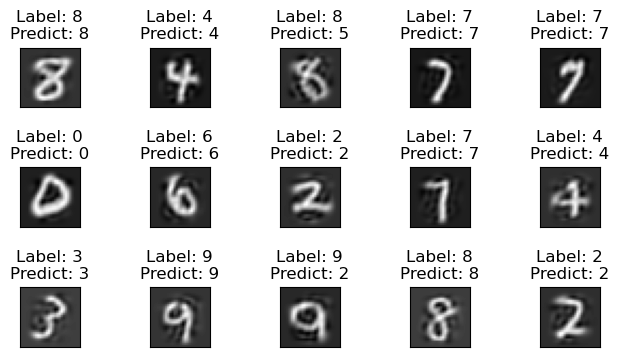

In [28]:
# 80:20
label_test(X_test2, y_test2, gnb_y_test_pred2)

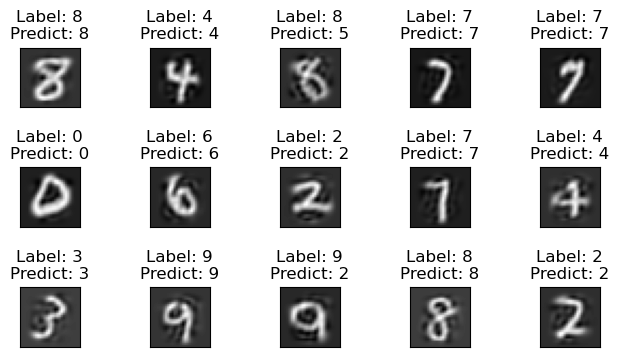

In [29]:
# 90:10
label_test(X_test3, y_test3, gnb_y_test_pred3)

SVM

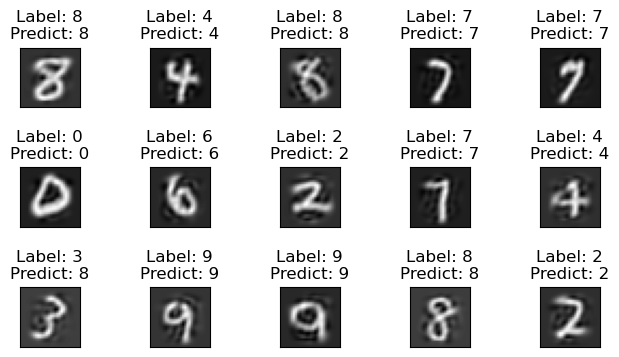

In [30]:
# 70:30
label_test(X_test1, y_test1, y_test_pred)

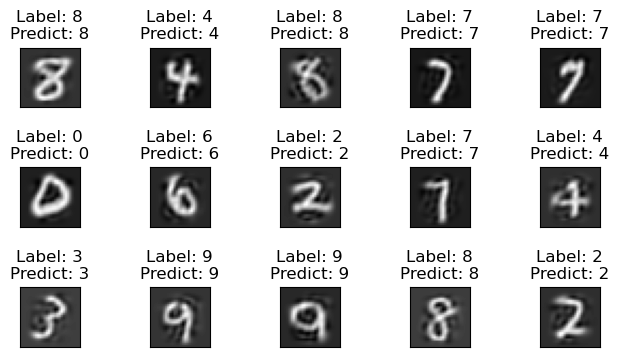

In [32]:
# 80:20
label_test(X_test2, y_test2, y_test_pred2)

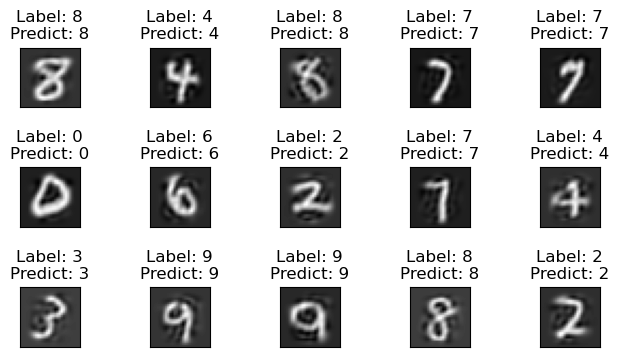

In [33]:
# 90:10
label_test(X_test3, y_test3, y_test_pred3)

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi
yang didapatkan? Jelaskan!

In [34]:
#70:30
svm_accuracy1 = accuracy_score(y_test1, y_test_pred)
nb_accuracy1 = accuracy_score(y_test1, gnb_y_test_pred1)
#80:20
svm_accuracy2 = accuracy_score(y_test2, y_test_pred2)
nb_accuracy2 = accuracy_score(y_test2, gnb_y_test_pred2)
#90:10
svm_accuracy3 = accuracy_score(y_test3, y_test_pred3)
nb_accuracy3 = accuracy_score(y_test3, gnb_y_test_pred3)

print('Rasio 70:30')
print(f'Akurasi SVM: {svm_accuracy1 * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy1 * 100:.2f}%')
print()
print('Rasio 80:20')
print(f'Akurasi SVM: {svm_accuracy2 * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy2 * 100:.2f}%')
print()
print('Rasio 90:10')
print(f'Akurasi SVM: {svm_accuracy3 * 100:.2f}%')
print(f'Akurasi Naive Bayes: {nb_accuracy3 * 100:.2f}%')

Rasio 70:30
Akurasi SVM: 96.34%
Akurasi Naive Bayes: 87.08%

Rasio 80:20
Akurasi SVM: 97.11%
Akurasi Naive Bayes: 87.15%

Rasio 90:10
Akurasi SVM: 97.41%
Akurasi Naive Bayes: 87.16%


Jawab:

  Tingkat Akurasi
  - Rasio 70:30
    - Akurasi SVM: 96.34%
    - Akurasi Naive Bayes: 87.17%

  - Rasio 80:20
    - Akurasi SVM: 97.11%
    - Akurasi Naive Bayes: 87.22%

  - Rasio 90:10
    - Akurasi SVM: 97.41%
    - Akurasi Naive Bayes: 87.19%
  
    Berdasarkan data, model SVM memiliki tingkat akurasi paling tinggi, yaitu mencapai 97%, hal ini menunjukkan bahwa model ini lebih baik dalam mengklasifikasikan dari dataset MNIST. Namun, kelemahan dari metode SVC adalah lebih lambat dibandingkan dengan metode Naive Bayes

  Konfigurasi Model SVC:
  - Kernel: RBF (Radial Basis Function) dan ekstraksi fitur PCA